For training the model using a different dataset
1. You need to make sure that the dataset is having test or train directories or not
2. If not, divide it accordingly by 80% for training and 20% for testing.
3. specify the dataset path accordingly
4. In our case, the dataset was already divided into test and train directories.
5. For custom input images, we have already made structured code, where you just need to specify the path.
6. For input images, other than that of the dataset, use the CV code provided to change and then feed it into testing

In [1]:
!pip install kagglehub
import kagglehub

path = kagglehub.dataset_download("anurags397/hindi-mnist-data")
print("Found", path)

Found C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1


Using PyTorch

In [2]:
!pip install torch scikit-learn numpy matplotlib

In [3]:
import os

dataset_dir = r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1'
print("Contents of dataset directory:", os.listdir(dataset_dir))


Contents of dataset directory: ['DevanagariHandwrittenDigitDataset']


In [4]:
subdirs = os.listdir(dataset_dir)

for subdir in subdirs:
    subdir_path = os.path.join(dataset_dir, subdir)
    if os.path.isdir(subdir_path):
        print(f"Contents of {subdir}: {os.listdir(subdir_path)}")
    else:
        print(f"{subdir} is not a directory.")


Contents of DevanagariHandwrittenDigitDataset: ['Test', 'Train']


In [5]:
import os

train_dir =  r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Train'
test_dir =  r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Test'

def count_images_and_classes(dir):
    classes = os.listdir(dir)
    class_count = {}

    for cls in classes:
        class_path = os.path.join(dir, cls)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_count[cls] = num_images

    return class_count

train_count = count_images_and_classes(train_dir)
test_count = count_images_and_classes(test_dir)

print("No. of classes in training data", len(train_count))
print("No. of images in each class in training data", train_count)
print("No. of classes in testing data", len(test_count))
print("No. of images in each class in testing data", test_count)

No. of classes in training data 10
No. of images in each class in training data {'digit_0': 1700, 'digit_1': 1700, 'digit_2': 1700, 'digit_3': 1700, 'digit_4': 1700, 'digit_5': 1700, 'digit_6': 1700, 'digit_7': 1700, 'digit_8': 1700, 'digit_9': 1700}
No. of classes in testing data 10
No. of images in each class in testing data {'digit_0': 300, 'digit_1': 300, 'digit_2': 300, 'digit_3': 300, 'digit_4': 300, 'digit_5': 300, 'digit_6': 300, 'digit_7': 300, 'digit_8': 300, 'digit_9': 300}


In [6]:
from PIL import Image

image_path = os.path.join(test_dir, 'digit_0', '4574.png')

img = Image.open(image_path)
print(f"Image size: {img.size}")

Image size: (32, 32)


In [7]:
!pip install torchvision
import os
import torch
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [12]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((32, 32)),                  
    transforms.ToTensor(),                       
    transforms.Normalize((0.5,), (0.5,))          
])

train_dataset = datasets.ImageFolder(root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Train', transform=transform)
test_dataset = datasets.ImageFolder(root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Test', transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

def prepare_data(dataset):
    images = []
    labels = []
    for image, label in dataset:
        images.append(image.view(-1).numpy())  
        labels.append(label)
    return np.array(images), np.array(labels)

#here y_train is the ground truth of x_train 
#in the same way, y_test is the ground truth of x_test
X_train, y_train = prepare_data(train_dataset)
X_test, y_test = prepare_data(test_dataset)

K-Nearest Neighbours

In [16]:
!pip install joblib
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#training the model
knn_model = KNeighborsClassifier(n_neighbors=3) #k=3
knn_model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(knn_model, 'knn_model.pkl')

y_train_pred = knn_model.predict(X_train)
y_test_pred = knn_model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.4f}%')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.4f}%')

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 99.3000%
Testing Accuracy: 98.2667%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       300
           1       0.99      0.99      0.99       300
           2       0.94      0.98      0.96       300
           3       0.99      0.94      0.96       300
           4       0.99      1.00      1.00       300
           5       0.99      0.97      0.98       300
           6       1.00      0.98      0.99       300
           7       0.99      0.98      0.98       300
           8       0.99      1.00      1.00       300
           9       0.99      0.99      0.99       300

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000


Confusion Matrix (Test Set):
[[299   0   0   0   0   0   0   1   0   0]
 [  0 298   0   0   0   1   0   0   1   0]
 [  1   2 293   2   0   1   0   0  

Support Vector Machine

In [18]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)

joblib.dump(svm_model, 'svm_model.pkl')

y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.4f}%')

test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy * 100:.4f}%')

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 100.0000%
Testing Accuracy: 99.3000%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.98      0.99      0.98       300
           3       0.99      0.99      0.99       300
           4       1.00      1.00      1.00       300
           5       0.99      0.99      0.99       300
           6       1.00      0.99      0.99       300
           7       0.99      0.99      0.99       300
           8       0.99      1.00      1.00       300
           9       1.00      0.99      0.99       300

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000


Confusion Matrix (Test Set):
[[299   0   0   0   0   0   0   1   0   0]
 [  0 299   0   0   0   0   0   0   1   0]
 [  0   0 296   2   0   1   0   0 

Convolutional Neural Network(CNN)

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding = 1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride = 2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.dropout = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(128, num_classes) 

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #32*16*16
        x = self.pool(F.relu(self.conv2(x))) #64*8*8
        x = self.pool(F.relu(self.conv3(x))) #128*4*4
        
        x = x.view(x.size(0), -1)  # Flatten
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  
        return x

In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_classes = len(train_dataset.classes)  
model = CNNModel(num_classes).to(device)

#loss function as catergorial crossentropy and optimzer as adam also learning rate = 0.001
criterion = nn.CrossEntropyLoss() 
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 15
batch_size = 32
validation_steps = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    val_loss = 0.0
    val_steps = 0
    step = 0

    for images, labels in train_loader:
            step += 1
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    if step % validation_steps == 0:
            model.eval()
            with torch.no_grad():
                for val_images, val_labels in test_loader:
                    val_images, val_labels = val_images.to(device), val_labels.to(device)
                    val_outputs = model(val_images)
                    val_loss += criterion(val_outputs, val_labels).item()
                    val_steps += 1
            model.train()
            avg_val_loss = val_loss / val_steps
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{step}/{len(train_loader)}], "
                  f"Train Loss: {running_loss/step:.4f}, Validation Loss: {avg_val_loss:.4f}")

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {running_loss/len(train_loader): .4f}")

torch.save(model.state_dict(), "cnn_model.pth")
print("Model saved as cnn_model.pth")

model.eval()
def evaluate_model(loader):
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    return all_preds, all_labels


train_preds, train_labels = evaluate_model(train_loader)
test_preds, test_labels = evaluate_model(test_loader)

train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")

print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_preds))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(test_labels, test_preds))

Epoch 1/15, Train Loss:  0.3451
Epoch 2/15, Train Loss:  0.0841
Epoch 3/15, Train Loss:  0.0536
Epoch 4/15, Train Loss:  0.0400
Epoch 5/15, Train Loss:  0.0330
Epoch 6/15, Train Loss:  0.0232
Epoch 7/15, Train Loss:  0.0233
Epoch 8/15, Train Loss:  0.0197
Epoch 9/15, Train Loss:  0.0163
Epoch 10/15, Train Loss:  0.0204
Epoch 11/15, Train Loss:  0.0144
Epoch 12/15, Train Loss:  0.0167
Epoch 13/15, Train Loss:  0.0157
Epoch 14/15, Train Loss:  0.0075
Epoch 15/15, Train Loss:  0.0071
Model saved as cnn_model.pth
Training Accuracy: 99.9824%
Testing Accuracy: 99.6000%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.98      1.00      0.99       300
           3       1.00      0.99      0.99       300
           4       1.00      0.99      1.00       300
           5       0.99      0.99      0.99       300
           6    

VGG16

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  
    transforms.Resize((32, 32)),               
    transforms.ToTensor(),                       
    transforms.Normalize((0.5,), (0.5,))          
])


train_dataset = datasets.ImageFolder(
    root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Train',
    transform=transform
)
test_dataset = datasets.ImageFolder(
    root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Test',
    transform=transform
)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [11]:
model = models.vgg16(pretrained=True)
model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)  

for param in model.features.parameters():
    param.requires_grad = False
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

model_path = 'vgg16_devanagari_mnist.pth'
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

def evaluate_model(data_loader, model, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

train_preds, train_labels = evaluate_model(train_loader, model, device)
test_preds, test_labels = evaluate_model(test_loader, model, device)

train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")

print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_preds))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(test_labels, test_preds))

C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


NameError: name 'optim' is not defined

GoogLeNet(Inception v1)

In [58]:
# transform = transforms.Compose([
#     transforms.Grayscale(num_output_channels=1),  
#     transforms.Resize((224, 224)),               
#     transforms.ToTensor(),                       
#     transforms.Normalize((0.5,), (0.5,))          
# ])

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), 
    transforms.Resize((224, 224)),                
    transforms.ToTensor(),              
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize((0.5,) * 3, (0.5,) * 3)  
])

train_dataset = datasets.ImageFolder(
    root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Train',
    transform=transform
)
test_dataset = datasets.ImageFolder(
    root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Test',
    transform=transform
)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = models.googlenet(pretrained=True)

model.conv2d_1a = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
# nn.init.kaiming_normal_(model.conv2d_1a.weight, mode='fan_out', nonlinearity='relu')
# model.transform_input = False
model.fc = nn.Linear(model.fc.in_features, 10)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:  
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

def evaluate_model(data_loader, model, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels
    
torch.save(model.state_dict(), 'googlenet_devanagari_mnist.pth')
print(f"Model saved.")

train_preds, train_labels = evaluate_model(train_loader, model, device) 
test_preds, test_labels = evaluate_model(test_loader, model, device) 

train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")

print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_preds))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(test_labels, test_preds))

Epoch [1/10], Loss: 1.0636
Epoch [2/10], Loss: 0.4255
Epoch [3/10], Loss: 0.2966
Epoch [4/10], Loss: 0.2415
Epoch [5/10], Loss: 0.2092
Epoch [6/10], Loss: 0.1804
Epoch [7/10], Loss: 0.1655
Epoch [8/10], Loss: 0.1534
Epoch [9/10], Loss: 0.1423
Epoch [10/10], Loss: 0.1324
Model saved.
Training Accuracy: 98.0941%
Testing Accuracy: 97.9667%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      0.99      0.99       300
           2       0.98      0.95      0.97       300
           3       0.96      0.96      0.96       300
           4       0.99      0.98      0.98       300
           5       0.96      0.98      0.97       300
           6       0.93      0.99      0.96       300
           7       0.99      0.99      0.99       300
           8       0.99      1.00      1.00       300
           9       0.99      0.96      0.98       300

    accuracy                  

ResNet-50

In [9]:
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1), 
    transforms.Resize((224, 224)),                
    transforms.ToTensor(),              
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Normalize((0.5,) * 3, (0.5,) * 3)  
])

train_dataset = datasets.ImageFolder(
    root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Train',
    transform=transform
)
test_dataset = datasets.ImageFolder(
    root=r'C:\Users\khush\.cache\kagglehub\datasets\anurags397\hindi-mnist-data\versions\1\DevanagariHandwrittenDigitDataset\Test',
    transform=transform
)

batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model = models.resnet50(pretrained=True)
# model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(model.fc.in_features, 10)

for param in model.parameters():
    param.requires_grad = False

for param in model.fc.parameters():
    param.requires_grad = True

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader: 
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

torch.save(model.state_dict(), 'resnet50_devanagari_mnist.pth')
print(f"Model saved.")

train_preds, train_labels = evaluate_model(train_loader, model, device)
test_preds, test_labels = evaluate_model(test_loader, model, device)  

train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")

print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_preds))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(test_labels, test_preds))

C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Loss: 0.8627
Epoch [2/10], Loss: 0.3085
Epoch [3/10], Loss: 0.2207
Epoch [4/10], Loss: 0.1766
Epoch [5/10], Loss: 0.1489
Epoch [6/10], Loss: 0.1327
Epoch [7/10], Loss: 0.1151
Epoch [8/10], Loss: 0.1061
Epoch [9/10], Loss: 0.0969
Epoch [10/10], Loss: 0.0894
Model saved.


NameError: name 'evaluate_model' is not defined

In [12]:
# model = models.resnet50(pretrained=False)
# num_classes = 10
# model.fc = nn.Linear(model.fc.in_features, num_classes)
model.load_state_dict(torch.load('resnet50_devanagari_mnist.pth', map_location=device))
model.to(device)


# model.load_state_dict(torch.load('resnet50_devanagari_mnist.pth', map_location=device))
model.eval()

def evaluate_model(data_loader, model, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

train_preds, train_labels = evaluate_model(train_loader, model, device)
test_preds, test_labels = evaluate_model(test_loader, model, device)  

train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"Training Accuracy: {train_accuracy * 100:.4f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.4f}%")

print("\nClassification Report (Test Set):")
print(classification_report(test_labels, test_preds))

print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(test_labels, test_preds))

C:\Users\khush\AppData\Local\Temp\ipykernel_26644\1087068099.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('resnet50_devanagari_mnist.

Training Accuracy: 98.4176%
Testing Accuracy: 97.2667%

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       300
           1       0.98      0.99      0.99       300
           2       0.93      0.97      0.95       300
           3       0.99      0.93      0.96       300
           4       0.98      0.98      0.98       300
           5       0.99      0.97      0.98       300
           6       0.95      0.93      0.94       300
           7       0.96      0.99      0.98       300
           8       0.97      1.00      0.99       300
           9       0.97      0.97      0.97       300

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000


Confusion Matrix (Test Set):
[[296   0   0   0   0   0   0   3   1   0]
 [  0 297   0   0   0   0   1   0   1   1]
 [  0   0 292   3   2   2   0   0  

In [45]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = self.pool(F.relu(self.conv3(x)))  
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_model(model_path, num_classes):
    model = CNNModel(num_classes).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device)) 
    model.to(device).eval() 
    return model


def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1), 
        transforms.Resize((32, 32)),  
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.5], std=[0.5])  
    ])
    
    image = Image.open(image_path).convert('L') 
    input_tensor = transform(image).unsqueeze(0) 
    return input_tensor.to(device)


def predict(model, input_tensor):
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted_class = torch.max(outputs, 1)   
        return predicted_class.item()  

# # predicted_label = predict(model, input_tensor)
# print(f"Predicted Label: {predicted_label}")

# Image path and model path
image_path = r'C:\Users\khush\Desktop\e.jpg' 
model_path = r'C:\Users\khush\Downloads\cnn_model.pth' 


num_classes = 10  
input_tensor = preprocess_image(image_path)
model = load_model(model_path, num_classes)
predicted_label = predict(model, input_tensor)
print(f"Predicted Label: {predicted_label}")


Predicted Label: 3


C:\Users\khush\AppData\Local\Temp\ipykernel_8932\3924069665.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=de

In [46]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = self.pool(F.relu(self.conv3(x)))  
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_model(model_path, num_classes):
    model = CNNModel(num_classes).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device)) 
    model.to(device).eval() 
    return model


def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1), 
        transforms.Resize((32, 32)),  
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.5], std=[0.5])  
    ])
    
    image = Image.open(image_path).convert('L') 
    input_tensor = transform(image).unsqueeze(0) 
    return input_tensor.to(device)


def predict(model, input_tensor):
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted_class = torch.max(outputs, 1)   
        return predicted_class.item()  

# # predicted_label = predict(model, input_tensor)
# print(f"Predicted Label: {predicted_label}")

# Image path and model path
image_path = r"C:\Users\khush\Desktop\f.jpg" 
model_path = r'C:\Users\khush\Downloads\cnn_model.pth' 


num_classes = 10  
input_tensor = preprocess_image(image_path)
model = load_model(model_path, num_classes)
predicted_label = predict(model, input_tensor)
print(f"Predicted Label: {predicted_label}")


Predicted Label: 4


C:\Users\khush\AppData\Local\Temp\ipykernel_8932\636837815.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=dev

In [35]:
import joblib 
import numpy as np

# Load SVM model function
def load_svm_model(model_path):
    return joblib.load(model_path) 

def preprocess_image_for_svm(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1), 
        transforms.Resize((32, 32)),  
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.5], std=[0.5])  
    ])
    
    image = Image.open(image_path).convert('L')  
    input_tensor = transform(image).unsqueeze(0)  
    input_vector = input_tensor.view(-1).numpy()  
    return input_vector

def predict_svm(model, input_vector):
    predicted_class = model.predict([input_vector]) 
    return predicted_class[0]  

# Image path and model path
image_path = r'C:\Users\khush\Desktop\b.jpg'  
svm_model_path = r'C:\Users\khush\Downloads\knn_model.pkl' ##can also use this for knn
svm_model = load_svm_model(svm_model_path)
input_vector = preprocess_image_for_svm(image_path)
predicted_label_svm = predict_svm(svm_model, input_vector)
print(f"Predicted Label (SVM): {predicted_label_svm}")


Predicted Label (SVM): 0


In [26]:
def load_model(model_path, device):
    model = models.vgg16(pretrained=True)
    model.features[0] = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1)
    model.classifier[6] = nn.Linear(model.classifier[6].in_features, 10)  
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()  
    return model

def predict(model, input_tensor, device):
    input_tensor = input_tensor.to(device)  
    with torch.no_grad():
        outputs = model(input_tensor)  
        _, predicted_class = torch.max(outputs, 1)  
        return predicted_class.item() 
        
image_path = r'C:\Users\khush\Desktop\a.jpg' 
model_path = 'vgg16_devanagari_mnist.pth'  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_model(model_path, device)
input_tensor = preprocess_image(image_path)
predicted_label = predict(model, input_tensor, device)
print(f"Predicted Label: {predicted_label}")

C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\khush\AppData\Local\Temp\ipykernel_8932\4294212532.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/

Predicted Label: 0


In [27]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

def load_model(model_path, device):
    model = models.googlenet(pretrained=False, aux_logits=False)
    model.conv2d_1a = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  
    model.fc = nn.Linear(model.fc.in_features, 10)
    model.load_state_dict(torch.load(model_path, map_location=device))  
    model.to(device)
    model.eval()  
    return model


def predict(model, input_tensor, device):
    input_tensor = input_tensor.to(device)  
    with torch.no_grad():
        outputs = model(input_tensor)  
        _, predicted_class = torch.max(outputs, 1)  
        return predicted_class.item() -2
        
def preprocess_image(image_path):
    from PIL import Image
    import torchvision.transforms as transforms

    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1),  
        transforms.Resize((224, 224)),              
        transforms.ToTensor(),                       
        transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  
        transforms.Normalize((0.5,) * 3, (0.5,) * 3)  
    ])

    image = Image.open(image_path).convert('L') 
    return transform(image).unsqueeze(0) 


image_path = r'C:\Users\khush\Desktop\a.jpg'  
model_path = 'googlenet_devanagari_mnist.pth'  
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = load_model(model_path, device)
input_tensor = preprocess_image(image_path)
predicted_label = predict(model, input_tensor, device)
print(f"Predicted Label: {predicted_label}")


C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\khush\anaconda3\envs\dip\lib\site-packages\torchvision\models\googlenet.py:47: FutureWarning: The default weight initialization of GoogleNet will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(
C:\Users\khush\AppData\Local\Temp\ipykernel_8932\3876959849.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorc

Predicted Label: 0


In [17]:

from PIL import Image
img_test = r'C:\Users\khush\Desktop\a.jpg'
with Image.open(image_path) as img:
    width, height = img.size
    print(f"Image size: {width}x{height}")


Image size: 32x32


In [51]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader

class CNNModel(nn.Module):
    def __init__(self, num_classes):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  
        x = self.pool(F.relu(self.conv2(x)))  
        x = self.pool(F.relu(self.conv3(x)))  
        x = x.view(x.size(0), -1)  
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def load_model(model_path, num_classes):
    model = CNNModel(num_classes).to(device)
    model.load_state_dict(torch.load(model_path, map_location=device)) 
    model.to(device).eval() 
    return model


def preprocess_image(image_path):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=1), 
        transforms.Resize((32, 32)),  
        transforms.ToTensor(),  
        transforms.Normalize(mean=[0.5], std=[0.5])  
    ])
    
    image = Image.open(image_path).convert('L') 
    input_tensor = transform(image).unsqueeze(0) 
    return input_tensor.to(device)


def predict(model, input_tensor):
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted_class = torch.max(outputs, 1)   
        return predicted_class.item()  

# # predicted_label = predict(model, input_tensor)
# print(f"Predicted Label: {predicted_label}")

# Image path and model path
image_path = r"C:\Users\khush\Desktop\k.jpg"  
model_path = r'C:\Users\khush\Downloads\cnn_model.pth' 


num_classes = 10  
input_tensor = preprocess_image(image_path)
model = load_model(model_path, num_classes)
predicted_label = predict(model, input_tensor)
print(f"Predicted Label: {predicted_label}")


Predicted Label: 3


C:\Users\khush\AppData\Local\Temp\ipykernel_8932\2629239909.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=de

In [44]:
!pip install opencv-python

import cv2

# Load the image
image_path = r'C:\Users\khush\Desktop\a.jpg'
original_image = cv2.imread(image_path)

gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])

digit_cropped = binary_image[y:y+h, x:x+w]
max_side = max(digit_cropped.shape)
padded_digit = cv2.copyMakeBorder(
    digit_cropped,
    top=(max_side - digit_cropped.shape[0]) // 2,
    bottom=(max_side - digit_cropped.shape[0]) - (max_side - digit_cropped.shape[0]) // 2,
    left=(max_side - digit_cropped.shape[1]) // 2,
    right=(max_side - digit_cropped.shape[1]) - (max_side - digit_cropped.shape[1]) // 2,
    borderType=cv2.BORDER_CONSTANT,
    value=0,
)

digit_resized = cv2.resize(padded_digit, (32, 32), interpolation=cv2.INTER_AREA)

final_image = 255 - digit_resized

# Save the processed image
output_path = r'C:\Users\khush\Desktop\d.png'
cv2.imwrite(output_path, final_image)

print(f"Processed image saved to: {output_path}")


Processed image saved to: C:\Users\khush\Desktop\d.png


CV code for changing the custom input image into the required image

Processed image saved to C:\Users\khush\Desktop\processed.jpgprocessed_image.jpg


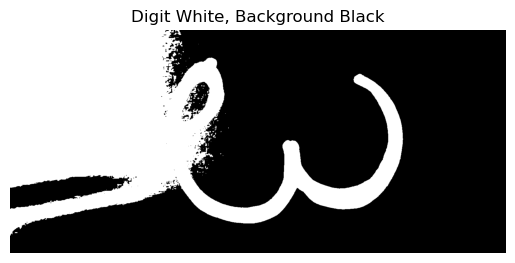

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def convert_digit_to_white(image_path, save_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    inverted_image = cv2.bitwise_not(binary_image)
    save_file = save_path + 'processed_image.jpg'  
    cv2.imwrite(save_file, inverted_image)
    print(f"Processed image saved to {save_file}")
    plt.imshow(inverted_image, cmap='gray')
    plt.title("Digit White, Background Black")
    plt.axis('off')
    plt.show()


image_path = r"C:\Users\khush\Desktop\h.jpg" 
save_path = r"C:\Users\khush\Desktop\processed.jpg"
convert_digit_to_white(image_path, save_path)

For training the model using a different dataset
1. You need to make sure that the dataset is having test or train directories or not
2. If not, divide it accordingly by 80% for training and 20% for testing.
3. specify the dataset path accordingly
4. In our case, the dataset was already divided into test and train directories.
5. For custom input images, we have already made structured code, where you just need to specify the path.
6. For input images, other than that of the dataset, use the CV code provided to change and then feed it into testing